Our Objective is to predict the house price based on the given information. Build different machine learning model, compare and finalise the model. And also conduct some Exploratary Data Analsys prior to the model building.

In [1]:
#importing all the neccassary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn import metrics 
%matplotlib inline
import pickle

In [2]:
#importing the dataset
df = pd.read_csv("house_price.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


**Exploratory Data Analysis**

In [3]:
#describe dataset to see the percentiles and statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


Inferences:

1. Maximum number of bedrooms is seen to be 33, which is very higher than the average. This may be an outlier or some exceptional case.
2. Many of the data are distributed as there minimum and maximum value have large variations with the average.

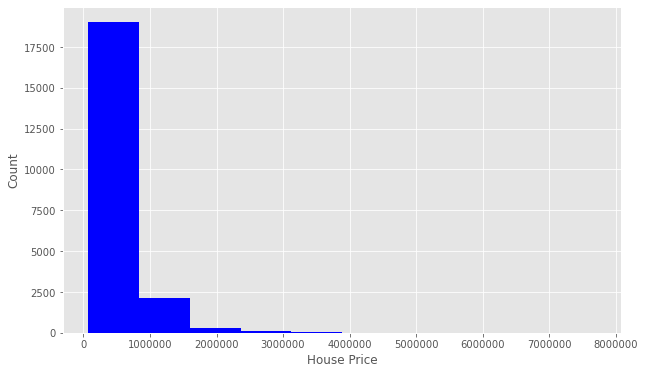

In [4]:
#Analysis of distribution of variables
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
plt.hist(df['price'], color='blue')
plt.xlabel('House Price')
plt.ylabel('Count')
plt.ticklabel_format(style='plain')
plt.show()

Most of the houses cost below 1 million.

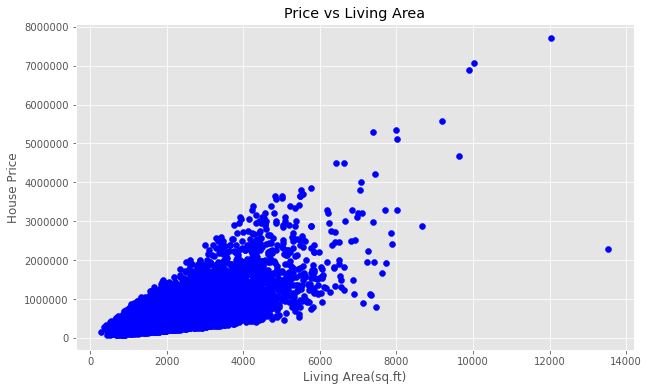

In [5]:
#Living area(sq.ft) vs House price
plt.scatter(df.sqft_living, df.price, color = 'b')
plt.title("Price vs Living Area")
plt.xlabel('Living Area(sq.ft)')
plt.ylabel('House Price')
plt.ticklabel_format(style='plain')
plt.show()

In general, larger living area means higher house price. But it is also visible that very few houses with large living area has been sold for low price.

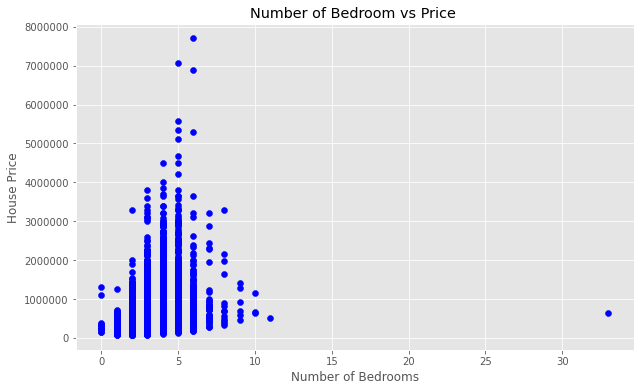

In [6]:
#Comparison of house price with number of bedrooms.
plt.scatter(df.bedrooms,df.price, color = 'b')
plt.title("Number of Bedroom vs Price ")
plt.xlabel("Number of Bedrooms")
plt.ylabel("House Price")
plt.ticklabel_format(style='plain')
plt.show()

In general, house price increases with increase in number of bedrooms. However, there are some exceptions observed where even if the number of bedrooms are higher the house price stays low. Many other factors may be influencing these occurance.

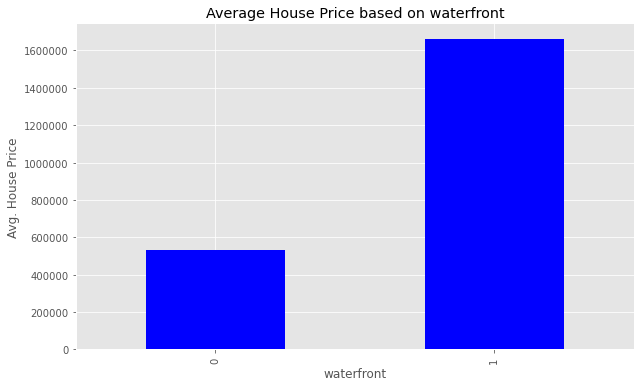

In [7]:
#price comparison between waterfront and non waterfront houses.
plt.title("Average House Price based on waterfront")
plt.ylabel("Avg. House Price")
plt.ticklabel_format(style='plain')
df.groupby('waterfront')["price"].mean().plot(kind='bar', color = 'b')
plt.show()


Houses overlooking the waterfront seems to have higher prices than the others.

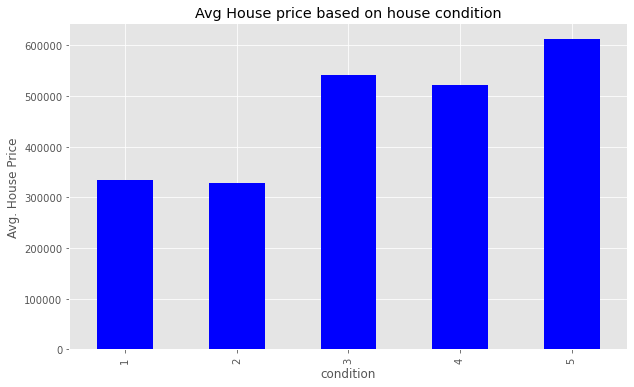

In [8]:
#House price comparison based on condition of houses.
plt.title("Avg House price based on house condition")
plt.ylabel("Avg. House Price")
plt.ticklabel_format(style='plain')
df.groupby('condition')["price"].mean().plot(kind='bar', color = 'b')
plt.show()

As the condition of the house gets better, the price also increases.

**Data Preperation**

Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

Dataset contains no null values

The date feature is cannot be used for prediction of house price, It doesn't add much value to the prediction.
So we are dropping 'date' colomn

In [10]:
df.drop(['date'], inplace=True, axis=1)

Since 'id' is unique for houses we cannot use that feature for prediction. Therefore dropping 'id' colomn

In [11]:
df.drop(['id'], inplace=True, axis=1)

The 'zipcode' feature is unique for each locality independent of house characteristics. Also we cannot it as an categorical value, since they are unique and area dependant. So we are dropping 'zipcode' column.

In [12]:
df.drop(['zipcode'], inplace=True, axis=1)

In [13]:
#df.drop(['yr_built'], inplace=True, axis=1)

In [14]:
#df.drop(['yr_renovated'], inplace=True, axis=1)

<AxesSubplot:>

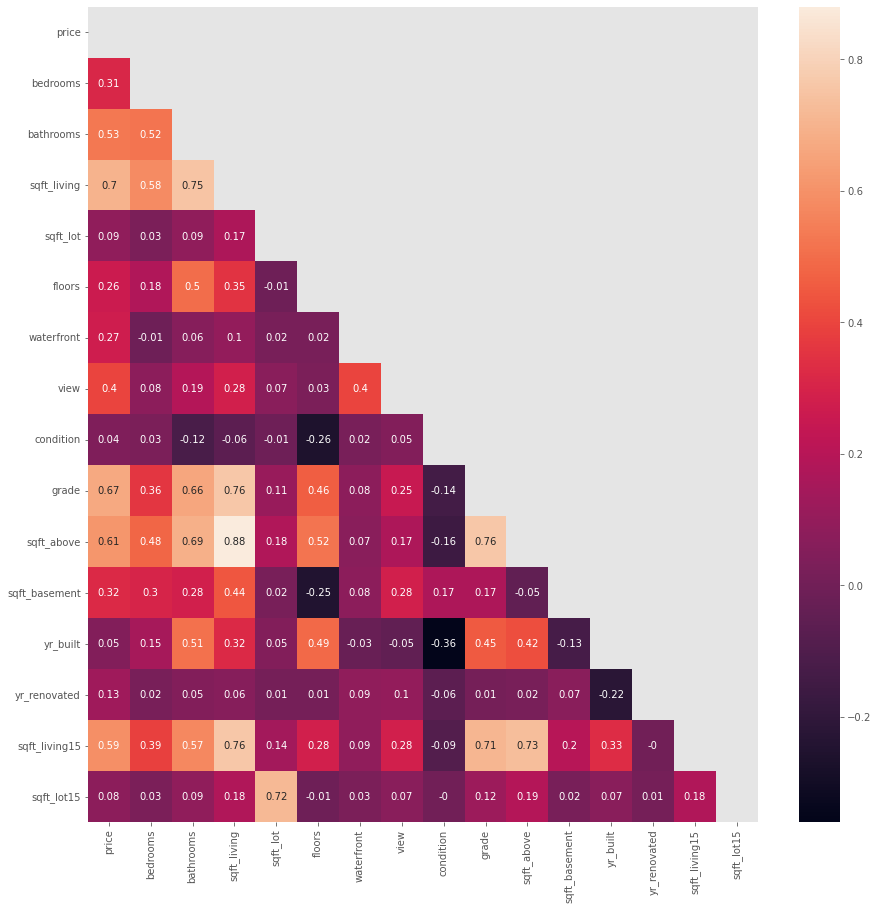

In [15]:
#Find Independent Column Correlations through Heatmap
mask = np.triu(np.ones_like(df.corr(), dtype=bool)) #Creaing a mask to onlyshow the bottom triangle
plt.subplots(figsize=(15,15))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, mask=mask)

In [16]:
#Find Independent Column Correlations
def correlation(dataset,threshold):
    col_corr= [] # List of correlated columns
    corr_matrix=dataset.corr() #finding correlation between columns
    for i in range (len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking correlation between columns
                colName=(corr_matrix.columns[i], corr_matrix.columns[j]) #getting correlated columns
                col_corr.append(colName) #adding correlated column name
    return col_corr #returning set of column names
col=correlation(df,0.8)
print('Correlated columns @ 0.8:', col)

Correlated columns @ 0.8: [('sqft_above', 'sqft_living')]


Here, we can remove the columns that highly correlated to each other since they will perform similarly along the model. ('sqft_above', 'sqft_living') are have correlation above 0.8. So we can remove either of them.

In [17]:
#Dropping colomn 'sqft_above' from the dataset
df.drop(['sqft_above'], inplace=True, axis=1)

In [18]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,0,1987,0,1800,7503


Outliers handling

<AxesSubplot:>

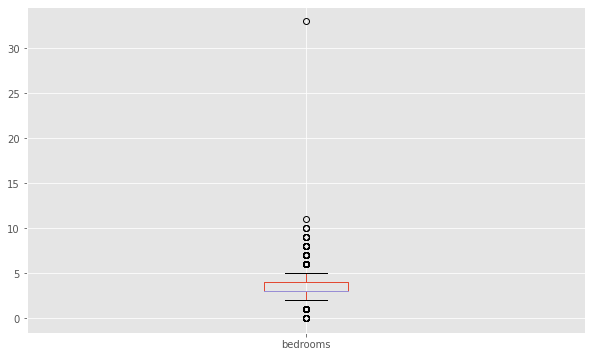

In [19]:
plt.ticklabel_format(style='plain')
df.boxplot(column=['bedrooms'])

In [20]:
outlier = np.where(df['bedrooms']>12)
df.drop(outlier[0], inplace=True)

Feature Selection

In [21]:
#Feature selection, defining X and Y variable
x = df.drop(['price'],axis=1).to_numpy()
y = df['price'].to_numpy()

Creatign Train and Test Dataset

In [22]:
#Creating Train, Validationn and Test Datasets
from sklearn.model_selection import train_test_split 
x_train, x_rem, y_train, y_rem = train_test_split(x, y,test_size = 0.2, random_state = 100) #splitting into train and test

#splitting test into validation and test
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5,  random_state = 100)

Scaling the Data  (not sure if needed or not)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

**Model Building**

1. Linear regression

In [24]:
#Model
from sklearn.linear_model import LinearRegression
lnr = LinearRegression()
lnr.fit(x_train2,y_train)
prediction_lnr = lnr.predict(x_test2)

#Evaluation matrices - Adj R2,MAE,and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,prediction_lnr)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test,prediction_lnr))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, prediction_lnr)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, prediction_lnr)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction_lnr)))) 


R2: 0.64
Adj_R2: 0.64
Mean Absolute Error: 137403.84
Mean Squared Error: 42859885767.34
Root Mean Squared Error: 207026.29


2. KNN Regression

In [25]:
#Model
from sklearn.neighbors import KNeighborsRegressor

#Search for an optimal value of K for KNN
from sklearn.model_selection import cross_val_score

k_range = range(5, 10)
k_scores = []

for k in k_range:
    knn_k = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn_k, x_train2, y_train, cv=10, scoring='neg_root_mean_squared_error')
    k_scores.append(scores.mean())
    
#Best Score
BestScore = [1 - x for x in k_scores]
best_k = k_range[BestScore.index(min(BestScore))]
print('Best k value is', best_k)

#Creating KNN model
knn = KNeighborsRegressor(n_neighbors = best_k)
knn.fit(x_train2, y_train)
prediction_knn = knn.predict(x_test2)

#Evaluation matrices - Adj R2,MAE,and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,prediction_knn)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test,prediction_knn))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, prediction_knn)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, prediction_knn)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction_knn))))

Best k value is 8

R2: 0.68
Adj_R2: 0.68
Mean Absolute Error: 125396.45
Mean Squared Error: 37735054670.70
Root Mean Squared Error: 194255.13


3. Gradient Boostig Regression

In [26]:
#Model
from sklearn import ensemble
gb = ensemble.GradientBoostingRegressor()
gb.fit(x_train2, y_train)
prediction_gb = gb.predict(x_test2)

#Evaluation matrices - Adj R2,MAE,and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,prediction_gb)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test,prediction_gb))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, prediction_gb)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, prediction_gb)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction_gb)))) 


R2: 0.74
Adj_R2: 0.74
Mean Absolute Error: 118866.62
Mean Squared Error: 30952259312.21
Root Mean Squared Error: 175932.54


4. Random Forest Regression

In [27]:
#Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train2,y_train)
prediction_rf = rf.predict(x_test2)

#Evaluation matrices - Adj R2,MAE,and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,prediction_rf)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test,prediction_rf))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, prediction_rf)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, prediction_rf)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction_rf))))


R2: 0.73
Adj_R2: 0.73
Mean Absolute Error: 111990.64
Mean Squared Error: 31173997945.70
Root Mean Squared Error: 176561.60


5. Decision Tree Regressor

In [28]:
#Model
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor()
dtr.fit(x_train2,y_train)
prediction_dtr = dtr.predict(x_test2)

#Evaluation matrices - Adj R2,MAE,and RMSE
print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,prediction_dtr)))
adjusted_r_squared = 1-(1-metrics.r2_score(y_test,prediction_dtr))*(len(y)-1)/(len(y)-x.shape[1]-1)
print('Adj_R2: {:0.2f}'.format(adjusted_r_squared))
print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, prediction_dtr)))  
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, prediction_dtr)))  
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, prediction_dtr))))


R2: 0.47
Adj_R2: 0.47
Mean Absolute Error: 154500.84
Mean Squared Error: 62441201367.32
Root Mean Squared Error: 249882.38


**Model Comparison**

In [29]:
models = []

models.append(('Linear Regression',  lnr))
models.append(('KNN', knn))
models.append(('Gradient Boost',  gb))
models.append(('Random Forest',  rf))
models.append(('Decision Tree',  dtr))

In [30]:
names = []
scores = []

for name, model in models:
    y_pred = model.predict(x_test2)
    scores.append('{:.2f}'.format(metrics.r2_score(y_test,y_pred)))
    names.append(name)

In [31]:
comparison = pd.DataFrame({'Name': names, 'Score' : scores})
print(comparison)

                Name Score
0  Linear Regression  0.64
1                KNN  0.68
2     Gradient Boost  0.74
3      Random Forest  0.73
4      Decision Tree  0.47


From the model comparison we can see that the Gradient Boost Regressor has got the highest accuracy/score compared to other 4 models that we have tried.

**Algorithm tuning for Gradient Boost Regressor**

In [32]:
#Choosing the best hyperparameters for the model
gb_tuned = ensemble.GradientBoostingRegressor(n_estimators = 400,
          max_depth = 5,
          min_samples_split = 2,
          learning_rate = 0.1,
          loss = 'ls')
gb_tuned.fit(x_train2, y_train)
prediction_gb_tuned = gb_tuned.predict(x_test2)

print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,prediction_gb_tuned))) #Accuracy

C:\Users\mikhi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(



R2: 0.75


Since there is no considerable change in the accuracy of the Gradient Boost algorithm, we are perfoming ensemble methods.

**Ensemble - Bagging Method** - Base models are run on bags to get a fair distribution of the whole dataset

In [33]:
from sklearn.ensemble import BaggingRegressor

final_model = BaggingRegressor(base_estimator=gb_tuned)
final_model.fit(x_train2,y_train)
prediction_fm = final_model.predict(x_test2)

print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,prediction_fm))) #Accuracy

C:\Users\mikhi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\mikhi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\mikhi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\mikhi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(
C:\Users\mikhi\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and 


R2: 0.76


Ensemble method doesn't produced much increase in the accuracy of model. So we are taking the Gradient Descent as the finalized model.

*Predictions on Validation Set*

In [34]:
valid_pred = final_model.predict(x_valid)

print('\nR2: {:.2f}'.format(metrics.r2_score(y_test,prediction_fm)))  #Accuracy


R2: 0.76


*Saving Model*

In [35]:
pickle.dump(final_model, open('houseprice.pkl','wb'))

For the house price prediction, we have done some data cleaning and tried using diffierent regression model and compared their accuracies. We have found that Gradient Boost Algorithm have got the highest accuracy among the models we have chosen and made it as the final model. Then performed predcition on accuracy, that also gives similar accuracy score. Finally saved our prediction model as 'houseprice' in .pkl format